In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import read_csv

In [3]:
from kdcount import correlate

In [4]:
from kdcount import sphere

In [5]:
gal_flux = read_csv(
    '/global/homes/y/yfeng1/m779/imaginglss/object_cats/ELG/ELG.txt.FLUXES', 
    delim_whitespace=True, comment='#', header=None).as_matrix()
gal_noise = read_csv('/global/homes/y/yfeng1/m779/imaginglss/object_cats/ELG/ELG.txt.NOISES', 
    delim_whitespace=True, comment='#', header=None).as_matrix()
gal_conf = gal_flux[:, 4:] / gal_noise[:, 3:]
gas_fc = read_csv('/global/homes/y/yfeng1/m779/imaginglss/object_cats/ELG/ELG.txt.FC', 
    delim_whitespace=True, comment='#', header=None).as_matrix()

In [7]:
ran = read_csv('/global/homes/y/yfeng1/m779/imaginglss/random_cats/ELG/ELG_rand.txt.NOISES', 
    delim_whitespace=True, comment='#').as_matrix()

In [11]:
ran_fc = read_csv('/global/homes/y/yfeng1/m779/imaginglss/random_cats/ELG/ELG_rand.txt.FC', 
    delim_whitespace=True, comment='#').as_matrix()

In [12]:
abin = sphere.AngularBinning(logspace(-4, -2.6, 10))
print abin.angular_centers

[ 0.00696351  0.00996285  0.01425408  0.02039364  0.02917765  0.04174514
  0.05972573  0.08545098  0.12225669]


In [19]:
mask = (gal_conf[:, 0] > 5) & (gal_conf[:, 1] > 5) & (gal_conf[:, 3] > 3) 
mask &= (gas_fc[:, 0] > 0.1)

In [20]:
print mask.sum()
print len(mask)

1683144
1939044


In [21]:
maskran = ran_fc[:, 0] > 0.1

In [22]:
D = sphere.points(gal_flux[mask][::1, 0], gal_flux[mask][::1, 1])
R = sphere.points(ran[maskran][::1, 0], ran[maskran][::1, 1],
                weights=ran_fc[maskran][::1, 0])

In [23]:
DD = correlate.paircount(D, D, abin, np=8)

In [24]:
DR = correlate.paircount(D, R, abin, np=8)

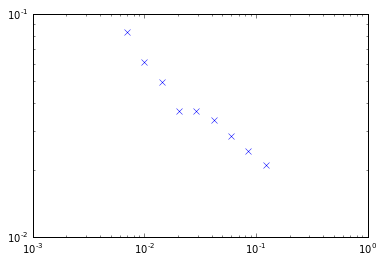

In [17]:
plot(abin.angular_centers, 1.0 *  (R.norm) / (D.norm) *  DD.sum1 / DR.sum1 - 1, 'x')
xscale('log')
yscale('log')

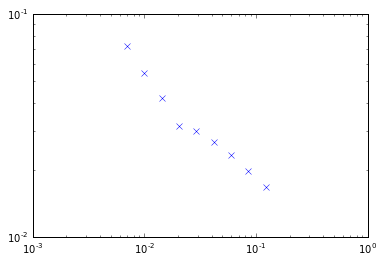

In [25]:
plot(abin.angular_centers, 1.0 *  (R.norm) / (D.norm) *  DD.sum1 / DR.sum1 - 1, 'x')
xscale('log')
yscale('log')

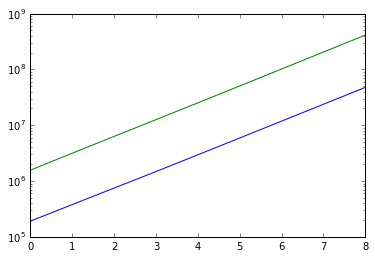

In [26]:
plot(DD.sum1)
plot(DR.sum1 * R.norm / D.norm)
yscale('log')